<a href="https://colab.research.google.com/github/Rishitha2805/Outbreak-Prediction-of-Covid-19-in-INDIA/blob/main/ML_Project_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Covid_Cases_dataset.csv to Covid_Cases_dataset.csv


In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline
# Manipulating the default plot size
# plt.rcParams['figure.figsize'] = 10, 12
 
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
df = pd.read_csv('/content/Covid_Cases_dataset.csv')
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df

NameError: ignored

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed

,Date,Confirmed
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,473105
175,2020-06-25,490401
176,2020-06-26,508953
177,2020-06-27,528859


In [ ]:
dates=list(confirmed['Date'])
len(dates)

179

In [ ]:
Y_confirmed=list(confirmed.iloc[:,-1].values)
Y_deaths=list(deaths.iloc[:,-1].values)
Y_recovered=list(recovered.iloc[:,-1].values)

In [ ]:
Y_confirmed

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 3

In [ ]:
X=np.array([i for i in range(len(dates))]).reshape(-1,1)
Y_confirmed=np.array(Y_confirmed).reshape(-1,1)
Y_deaths=np.array(Y_deaths).reshape(-1,1)
Y_recovered=np.array(Y_recovered).reshape(-1,1)

In [ ]:
days_in_future=20
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-20]
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

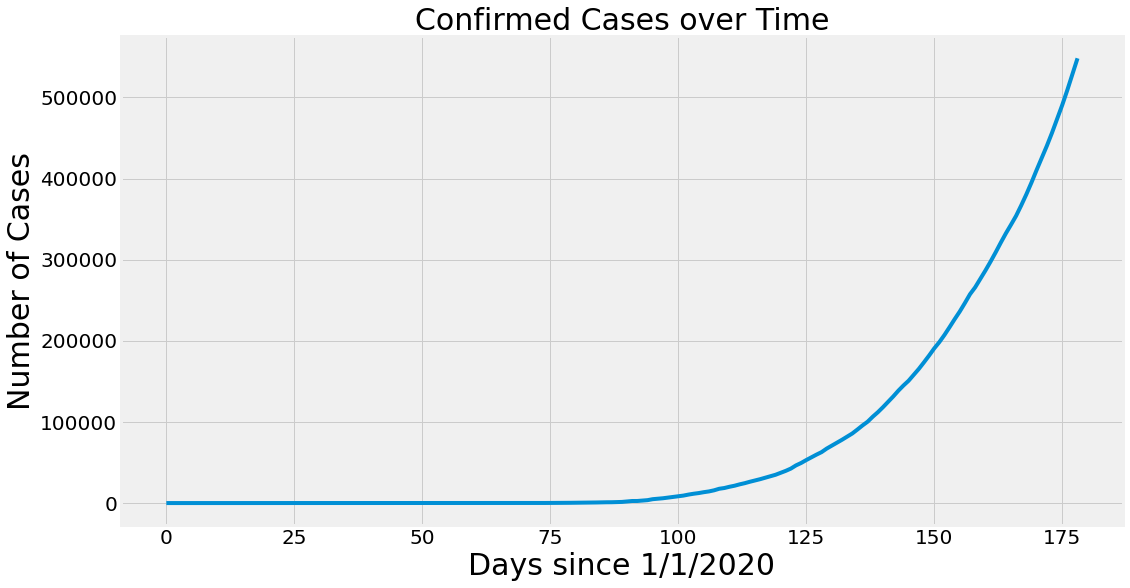

In [ ]:
adjusted_dates=adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

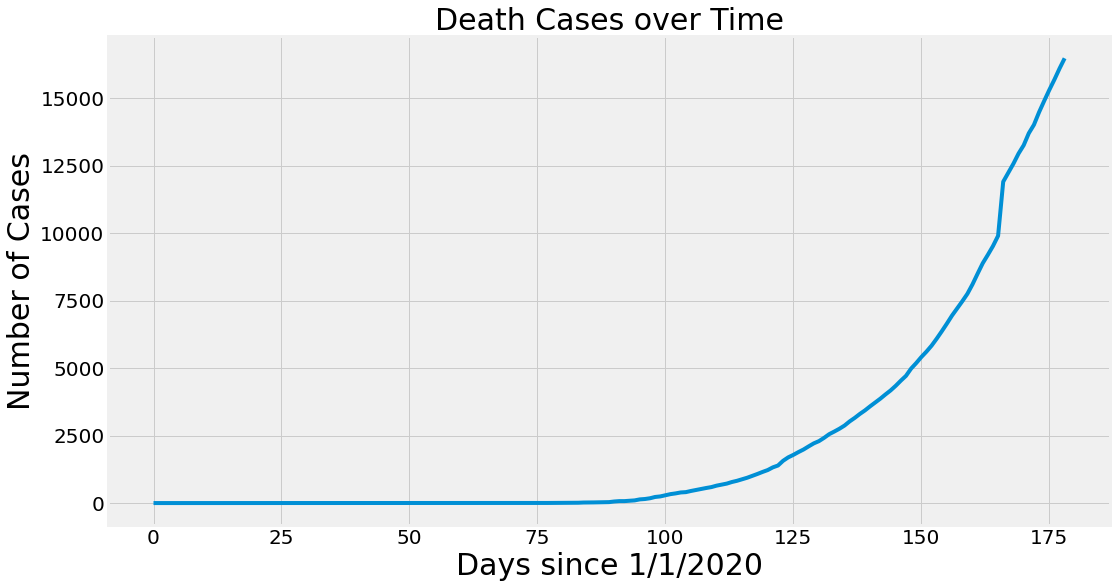

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.title('Death Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

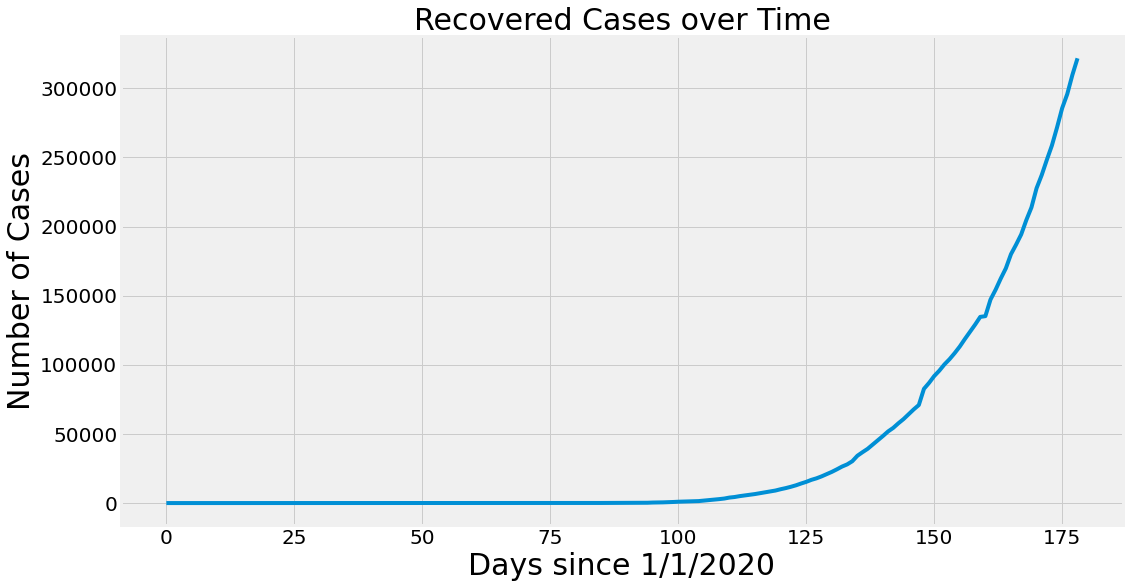

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.title('Recovered Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print(len(X),len(Y_confirmed))

179 179


In [ ]:
start='2020-01-01'
start_date=datetime.datetime.strptime(start,'%Y-%m-%d')
future_forecast_dates=[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%Y-%m-%d'))
# X[0] = pd.to_datetime(X[0], format='%Y-%m-%d')

# ***Confirmed***

In [ ]:
X_train_confirmed,X_test_confirmed,Y_train_confirmed,Y_test_confirmed=train_test_split(X,Y_confirmed,test_size=0.2)

In [ ]:
dt_confirmed=DecisionTreeClassifier( criterion='entropy', random_state=0)
dt_confirmed.fit(X_train_confirmed,Y_train_confirmed)
dt_pred=dt_confirmed.predict(future_forecast)

In [ ]:
dt_pred

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      3,      0,      0,
            0,      0,      0,      0,      0,      1,      1,      1,
            1,      1,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      5,      5,     31,
           31,     34,     39,     43,     56,     56,     73,     73,
          102,    113,    119,    142,    156,    194,    194,    330,
          396,    499,    536,    657,    657,    887,    987,   1024,
         1251,   1251,   1998,   2543,   2543,   3082,   3588,   4778,
         5311,   5916,   6725,   6725,   8446,   9205,  10453,  11487,
        12322,  13430,  14352,  15722,  17615,  17615,  20080,  21370,
      

In [ ]:
dt_confirmed

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Root mean square error 5235.86597952579
Root mean absolute error 50.216752406166435


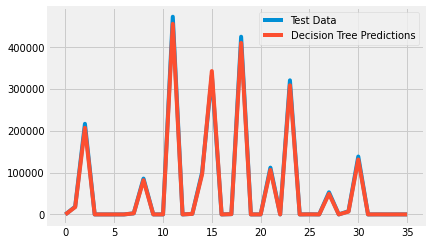

In [ ]:
dt_test_pred=dt_confirmed.predict(X_test_confirmed)
plt.plot(Y_test_confirmed)
plt.plot(dt_test_pred)
plt.legend(['Test Data','Decision Tree Predictions'])
mse = math.sqrt(mean_squared_error(dt_test_pred, Y_test_confirmed)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(dt_test_pred, Y_test_confirmed)) 
print('Root mean absolute error', mae) 

In [ ]:
dt_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Decision Tree Predicted # number of Confirmed cases in India':np.round(dt_pred[-20:])})
dt_df

,Date,Decision Tree Predicted # number of Confirmed cases in India
0,2020-06-28,548318
1,2020-06-29,548318
2,2020-06-30,548318
3,2020-07-01,548318
4,2020-07-02,548318
5,2020-07-03,548318
6,2020-07-04,548318
7,2020-07-05,548318
8,2020-07-06,548318
9,2020-07-07,548318


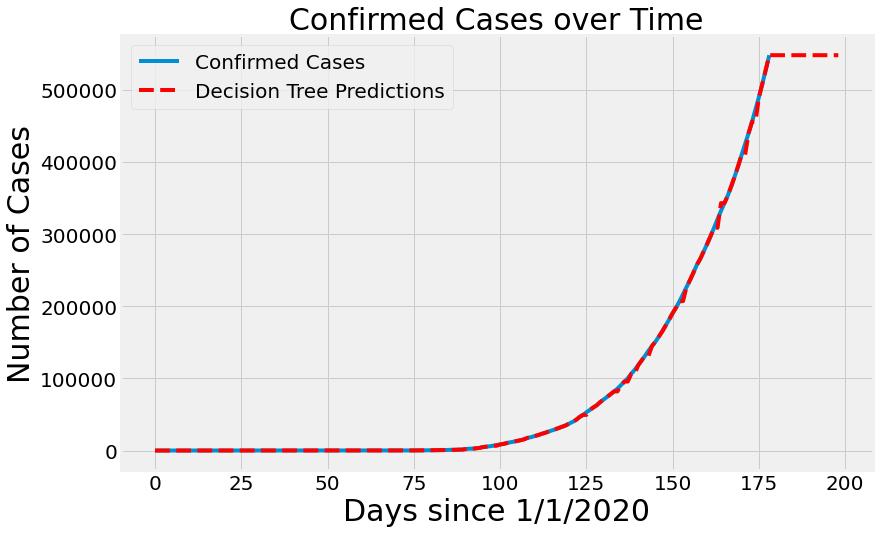

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(adjusted_dates,Y_confirmed)
plt.plot(future_forecast,dt_pred,linestyle='dashed',color='red')
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','Decision Tree Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# ***Deaths***

In [ ]:
X_train_deaths,X_test_deaths,Y_train_deaths,Y_test_deaths=train_test_split(X,Y_deaths,test_size=0.2)

In [ ]:
dt_deaths=DecisionTreeClassifier( criterion='entropy', random_state=0)
dt_deaths.fit(X_train_deaths,Y_train_deaths)
dt_pred=dt_deaths.predict(future_forecast)

Root mean square error 138.7362605810031
Root mean absolute error 9.041570660012562


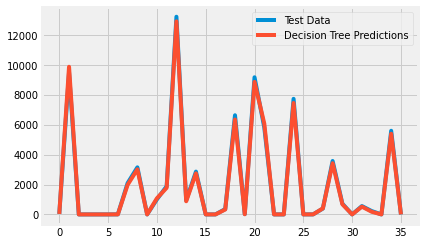

In [ ]:
dt_test_pred=dt_deaths.predict(X_test_deaths)
plt.plot(Y_test_deaths)
plt.plot(dt_test_pred)
plt.legend(['Test Data','Decision Tree Predictions'])
mse = math.sqrt(mean_squared_error(dt_test_pred, Y_test_deaths)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(dt_test_pred, Y_test_deaths)) 
print('Root mean absolute error', mae) 

In [ ]:
dt_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Decision Tree Predicted # number of Deaths in India':np.round(dt_pred[-20:])})
dt_df

,Date,Decision Tree Predicted # number of Deaths in India
0,2020-06-28,16475
1,2020-06-29,16475
2,2020-06-30,16475
3,2020-07-01,16475
4,2020-07-02,16475
5,2020-07-03,16475
6,2020-07-04,16475
7,2020-07-05,16475
8,2020-07-06,16475
9,2020-07-07,16475


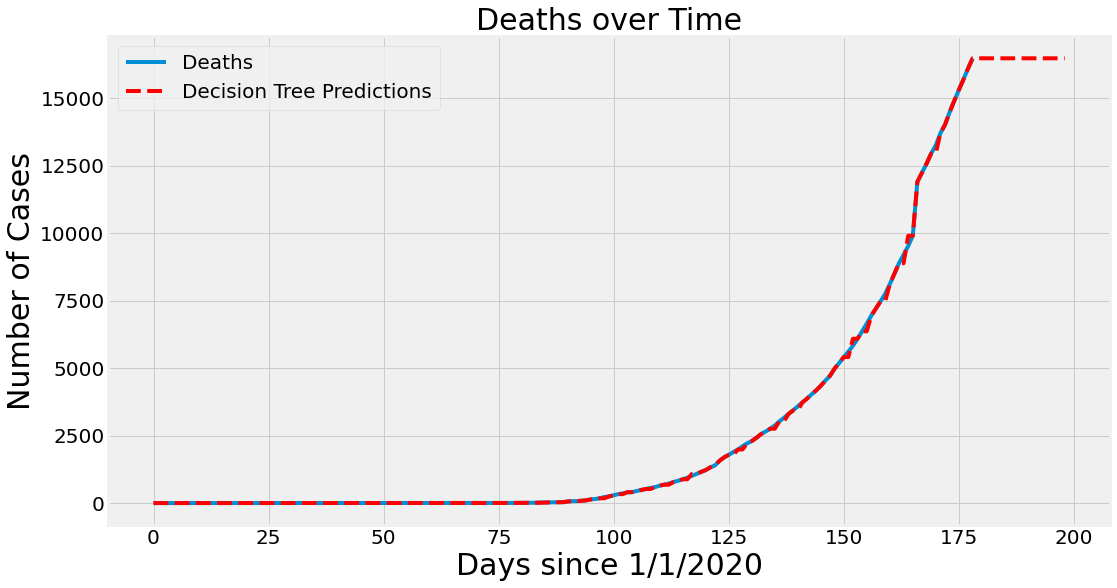

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.plot(future_forecast,dt_pred,linestyle='dashed',color='red')
plt.title('Deaths over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Deaths','Decision Tree Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# ***Recovered***

In [ ]:
X_train_recovered,X_test_recovered,Y_train_recovered,Y_test_recovered=train_test_split(X,Y_recovered,test_size=0.2)

In [ ]:
dt_recovered=DecisionTreeClassifier( criterion='entropy', random_state=0)
dt_recovered.fit(X_train_recovered,Y_train_recovered)
dt_pred=dt_recovered.predict(future_forecast)

Root mean square error 4411.1516983159345
Root mean absolute error 46.00332113614794


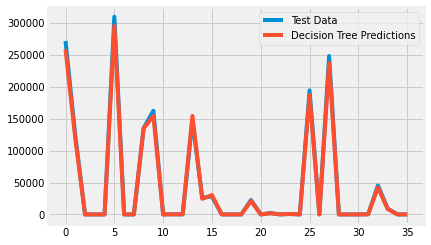

In [ ]:
dt_test_pred=dt_recovered.predict(X_test_recovered)
plt.plot(Y_test_recovered)
plt.plot(dt_test_pred)
plt.legend(['Test Data','Decision Tree Predictions'])
mse = math.sqrt(mean_squared_error(dt_test_pred, Y_test_recovered)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(dt_test_pred, Y_test_recovered)) 
print('Root mean absolute error', mae) 

In [ ]:
dt_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Decision Tree Predicted # number of Recovered cases in India':np.round(dt_pred[-20:])})
dt_df

,Date,Decision Tree Predicted # number of Recovered cases in India
0,2020-06-28,321723
1,2020-06-29,321723
2,2020-06-30,321723
3,2020-07-01,321723
4,2020-07-02,321723
5,2020-07-03,321723
6,2020-07-04,321723
7,2020-07-05,321723
8,2020-07-06,321723
9,2020-07-07,321723


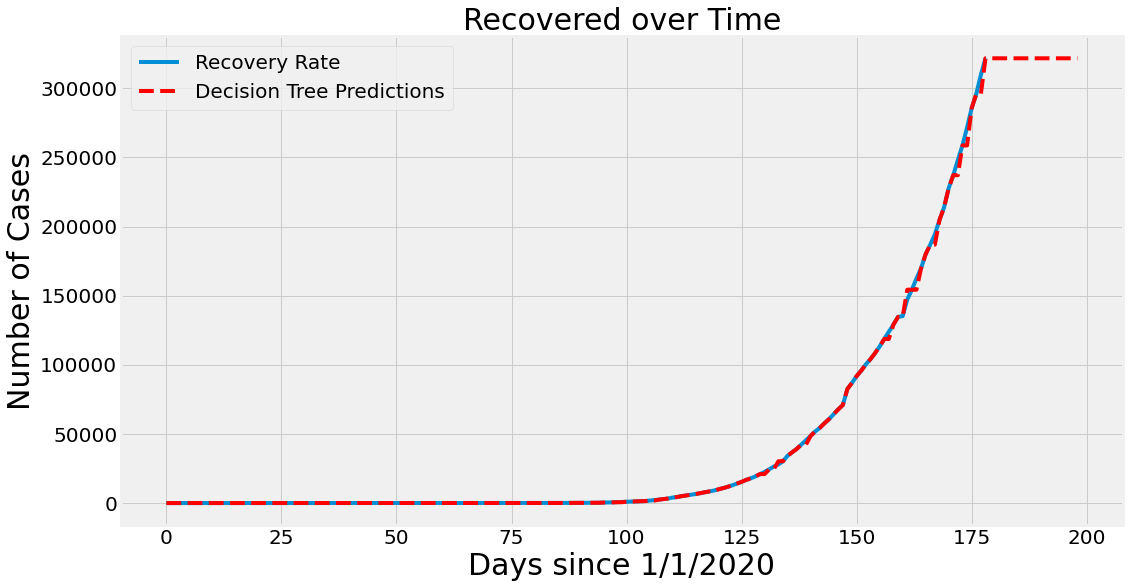

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.plot(future_forecast,dt_pred,linestyle='dashed',color='red')
plt.title('Recovered over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Recovery Rate','Decision Tree Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()